# **IMPORTING LIBRARY**

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date,datetime,timedelta

# **IMPORTING DATASET**

In [122]:
data=pd.read_csv("/content/drive/MyDrive/Raw Data Set Decoder/Aviation dataset 1.csv")

In [123]:
data

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5263,05/20/2009,06:30,"Near Madiun, Indonesia",Military - Indonesian Air Force,NaN,Jakarta - Maduin,Lockheed C-130 Hercules,A-1325,1982,112.0,98.0,2.0,"While on approach, the military transport cras..."
5264,05/26/2009,NaN,"Near Isiro, DemocratiRepubliCongo",Service Air,NaN,Goma - Isiro,Antonov An-26,9Q-CSA,5005,4.0,4.0,NaN,The cargo plane crashed while on approach to I...
5265,06/01/2009,00:15,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,447,Rio de Janeiro - Paris,Airbus A330-203,F-GZCP,660,228.0,228.0,0.0,The Airbus went missing over the AtlantiOcean ...
5266,06/07/2009,08:30,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,NaN,Lourdes de BlanSablon - Port Hope Simpson,Britten-Norman BN-2A-27 Islander,C-FJJR,424,1.0,1.0,0.0,The air ambulance crashed into hills while att...


# **CHECKING SHAPE**

In [124]:
data.shape

(5268, 13)

# **CHECKING FUR NULL VALUES**

In [125]:
data.isnull().sum()

Date               0
Time            2219
Location          20
Operator          18
Flight #        4199
Route           1706
Type              27
Registration     335
cn/In           1228
Aboard            22
Fatalities        12
Ground            22
Summary          390
dtype: int64

# **REPLACING ALL TIME VALUE**

In [126]:
data['Time']=data['Time'].replace(np.nan,'00:00')
data.isnull().sum()

Date               0
Time               0
Location          20
Operator          18
Flight #        4199
Route           1706
Type              27
Registration     335
cn/In           1228
Aboard            22
Fatalities        12
Ground            22
Summary          390
dtype: int64

In [127]:
data['Time'].value_counts()

00:00    2223
15:00      32
12:00      31
11:00      29
19:30      26
         ... 
19:37       1
19:18       1
07:54       1
13:49       1
15:32       1
Name: Time, Length: 1005, dtype: int64

In [128]:
data['Time'] = data['Time'].str.replace('c: ','')
data['Time'] = data['Time'].str.replace('c:','')
data['Time'] = data['Time'].str.replace('c','')
data['Time'] = data['Time'].str.replace('12\'20','12:20')
data['Time'] = data['Time'].str.replace('18.40','18:40')
data['Time'] = data['Time'].str.replace('0943','09:43')
data['Time'] = data['Time'].str.replace('22\'08','22:08')
data['Time'] = data['Time'].str.replace('114:20','00:00')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """


In [129]:
data['Time']=data['Date']+' '+data['Time']
def todate(x):
  return datetime.strptime(x,'%m/%d/%Y %H:%M')
data['Time']=data['Time'].apply(todate)

# **CHECKING FROM DATE TO LAST DATE**

In [130]:
print('Data ranges from'+str(data.Time.min())+'to'+str(data.Time.max()))

Data ranges from1908-09-17 17:18:00to2009-06-08 00:00:00


# **CONVERTING ALL STRING TO UPPER IN OPERATOR COLUMN**

In [131]:
data.Operator=data.Operator.str.upper()

In [132]:
data.head(5)

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,1908-09-17 17:18:00,"Fort Myer, Virginia",MILITARY - U.S. ARMY,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,1912-07-12 06:30:00,"AtlantiCity, New Jersey",MILITARY - U.S. NAVY,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,1913-08-06 00:00:00,"Victoria, British Columbia, Canada",PRIVATE,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,1913-09-09 18:30:00,Over the North Sea,MILITARY - GERMAN NAVY,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,1913-10-17 10:30:00,"Near Johannisthal, Germany",MILITARY - GERMAN NAVY,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


# **EXPLORATORY DATA ANALYSIS**

# **TOTAL ACCIDENT BY YEAR **

In [133]:
Temp=data.groupby(data.Time.dt.year)[['Date']].count()
Temp.head(5)

,Date
Time,
1908,1
1912,1
1913,3
1915,2
1916,5


In [134]:
Temp=Temp.rename(columns={'Date':'Count'})
Temp.head(5)

,Count
Time,
1908,1
1912,1
1913,3
1915,2
1916,5


# **PLOTING GRAPH**

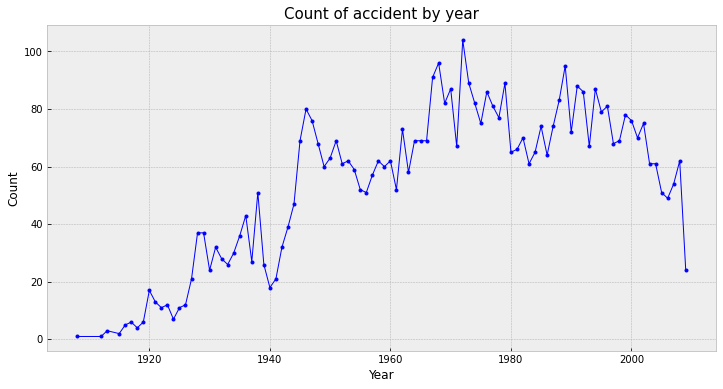

In [135]:
plt.figure(figsize=(12,6))
plt.style.use('bmh')
plt.plot(Temp.index,'Count',data=Temp,color='blue',marker='.',linewidth=1)
plt.xlabel('Year',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('Count of accident by year',fontsize=15)
plt.show()

# **IMPORTING LIBRARIES**

In [136]:
import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec

# **PLOTING GRAPH**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


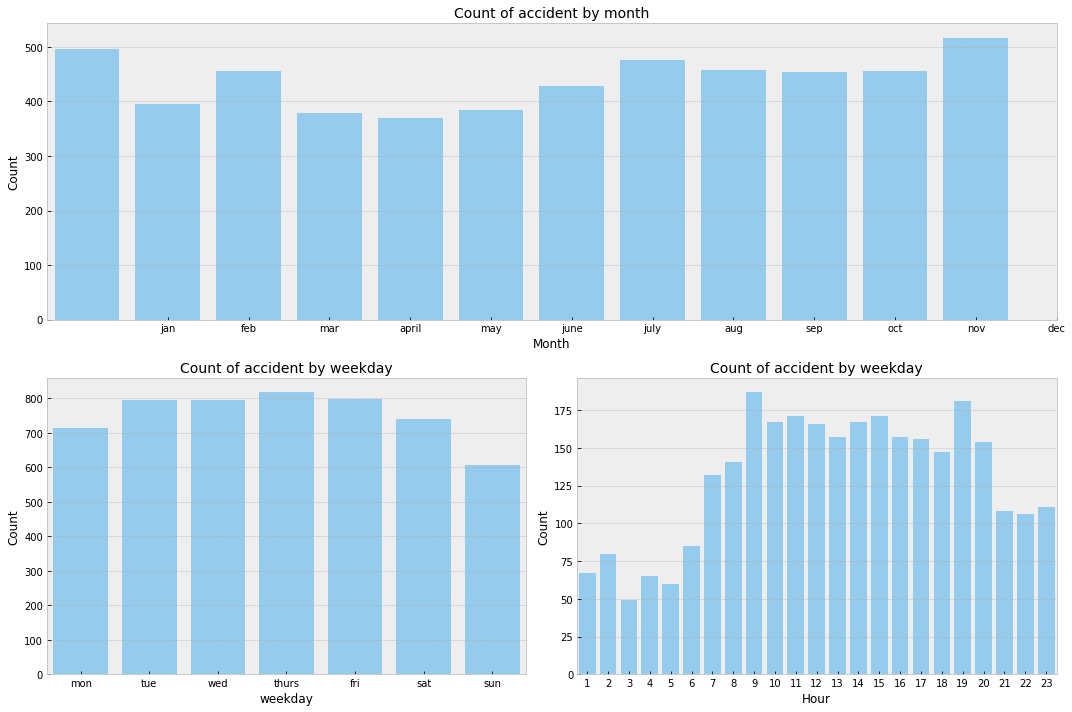

In [137]:
gs=gridspec.GridSpec(2,2)
pl.figure(figsize=(15,10))
plt.style.use('seaborn-muted')
ax=pl.subplot(gs[0,:])
sns.barplot(data.groupby(data.Time.dt.month)[['Date']].count().index,'Date',data=data.groupby(data.Time.dt.month)[['Date']].count(),color='lightskyblue',linewidth=2)
plt.xticks(data.groupby(data.Time.dt.month)[['Date']].count().index,['jan','feb','mar','april','may','june','july','aug','sep','oct','nov','dec'])
plt.xlabel('Month',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('Count of accident by month',fontsize=14)

ax=pl.subplot(gs[1,0])
sns.barplot(data.groupby(data.Time.dt.weekday)[['Date']].count().index,'Date',data=data.groupby(data.Time.dt.weekday)[['Date']].count(),color='lightskyblue',linewidth=2)
plt.xticks(data.groupby(data.Time.dt.weekday)[['Date']].count().index,['mon','tue','wed','thurs','fri','sat','sun'])
plt.xlabel('weekday',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('Count of accident by weekday',fontsize=14)

ax=pl.subplot(gs[1,1])
sns.barplot(data[data.Time.dt.hour!=0].groupby(data.Time.dt.hour)[['Date']].count().index,'Date',data=data[data.Time.dt.hour!=0].groupby(data.Time.dt.hour)[['Date']].count(),color='lightskyblue',linewidth=2)
plt.xlabel('Hour',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('Count of accident by weekday',fontsize=14)
plt.tight_layout()
plt.show()

# **MILITIRY FLIGHTS VS PASSENGERS FLIGHT**

# **COPYING DATA INTO NEW VARIABLE**

In [138]:
Temp=data.copy()
Temp['isMilitary']=Temp.Operator.str.contains('MILITARY')
Temp=Temp.groupby('isMilitary')[['isMilitary']].count()
Temp.index=['Passenger','Military']
Temp

,isMilitary
Passenger,4469
Military,781


# **AGAIN COPYING DATA INTO NEW VARIABLE AND ASSIGNING BOOLEAN VALUE**

In [139]:
Temp2=data.copy()
Temp2['Military']=Temp2.Operator.str.contains('MILITARY')
Temp2['Passenger']=Temp2.Military== False
Temp2=Temp2.loc[:,['Time','Military','Passenger']]
Temp2

,Time,Military,Passenger
0,1908-09-17 17:18:00,True,False
1,1912-07-12 06:30:00,True,False
2,1913-08-06 00:00:00,False,True
3,1913-09-09 18:30:00,True,False
4,1913-10-17 10:30:00,True,False
...,...,...,...
5263,2009-05-20 06:30:00,True,False
5264,2009-05-26 00:00:00,False,True
5265,2009-06-01 00:15:00,False,True
5266,2009-06-07 08:30:00,False,True


# **GROUPING BY FLIGHT TYPES**

In [140]:
Temp2=Temp2.groupby(Temp2.Time.dt.year)[['Military','Passenger']].aggregate(np.count_nonzero)
Temp2

,Military,Passenger
Time,,
1908,1,0
1912,1,0
1913,2,1
1915,2,0
1916,5,0
...,...,...
2005,7,44
2006,12,37
2007,6,48


# **PLOTING A PIE CHART AND GRAPH**

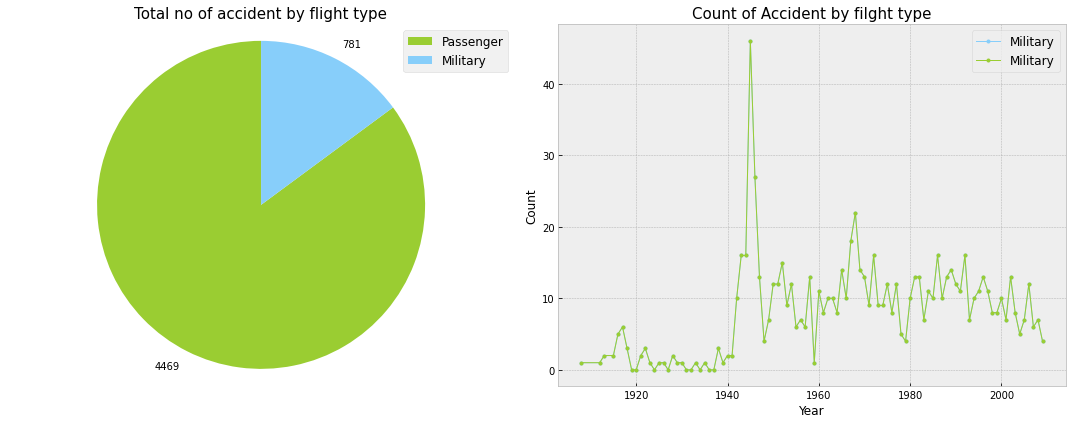

In [141]:
colors=['yellowgreen','lightskyblue']
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
patches,texts=plt.pie(Temp.isMilitary,colors=colors,labels=Temp.isMilitary,startangle=90)
plt.legend(patches,Temp.index,fontsize=12)
plt.axis('equal')
plt.title('Total no of accident by flight type',fontsize=15)

plt.subplot(1,2,2)
plt.plot(Temp2.index,'Military',data=Temp2,color='lightskyblue',marker='.',linewidth=1)
plt.plot(Temp2.index,'Military',data=Temp2,color='yellowgreen',marker='.',linewidth=1)

plt.legend(fontsize=12)
plt.xlabel('Year',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title("Count of Accident by filght type",fontsize=15)
plt.tight_layout()
plt.show()

# **PLOTING GRAPH OF TOTAL NUMBER OF FATALITIES**

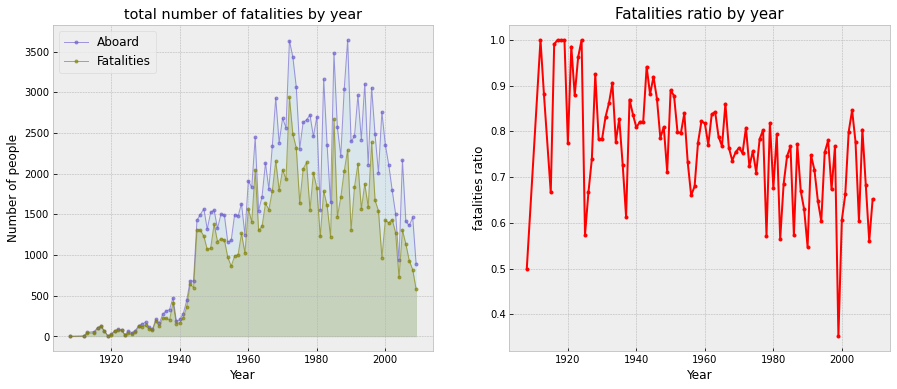

In [142]:
Fatalities=data.groupby(data.Time.dt.year).sum()
Fatalities['proportion']=Fatalities['Fatalities']/Fatalities['Aboard']

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.fill_between(Fatalities.index,'Aboard',data=Fatalities,color='skyblue',alpha=0.2)
plt.plot(Fatalities.index,'Aboard',data=Fatalities,marker='.',color='slateblue',alpha=0.6,linewidth=1)

plt.fill_between(Fatalities.index,'Fatalities',data=Fatalities,color='olive',alpha=0.2)
plt.plot(Fatalities.index,'Fatalities',data=Fatalities,marker='.',color='olive',alpha=0.6,linewidth=1)

plt.legend(fontsize=12)
plt.xlabel('Year',fontsize=12)
plt.ylabel('Number of people',fontsize=12)
plt.title('total number of fatalities by year')


plt.subplot(1,2,2)
plt.plot(Fatalities.index,'proportion',data=Fatalities,marker='.',color='red',linewidth=2)
plt.xlabel('Year',fontsize=12)
plt.ylabel('fatalities ratio',fontsize=12)
plt.title('Fatalities ratio by year',fontsize=15)
plt.show()

# **IMPORTING DATASET 2 FROM DRIVE**

In [143]:
Totals=pd.read_csv("/content/drive/MyDrive/Raw Data Set Decoder/Aviation dataset 2.csv")
Totals.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
0,Aruba,ABW,"Air transport, passengers carried",IS.AIR.PSGR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,223502.0,274280.00,NaN,NaN
1,Afghanistan,AFG,"Air transport, passengers carried",IS.AIR.PSGR,NaN,NaN,NaN,NaN,NaN,NaN,...,2.279341e+06,1.737962e+06,2044188.0,2209428.0,1929907.0,1917924.0,1647425.0,1722612.61,NaN,NaN
2,Angola,AGO,"Air transport, passengers carried",IS.AIR.PSGR,NaN,NaN,NaN,NaN,NaN,NaN,...,9.877980e+05,1.132424e+06,1321872.0,1409952.0,1244491.0,1482546.0,1375523.0,1516628.00,NaN,NaN
3,Albania,ALB,"Air transport, passengers carried",IS.AIR.PSGR,NaN,NaN,NaN,NaN,NaN,NaN,...,8.297789e+05,8.143397e+05,865848.0,151632.0,NaN,26634.0,204090.0,303137.00,NaN,NaN
4,Andorra,AND,"Air transport, passengers carried",IS.AIR.PSGR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **DROPING FIRST FOUR COLUMNS**

In [144]:
Totals=Totals.drop(['Country Name','Country Code','Indicator Code','Indicator Name'],axis=1)

# **REPLACING NAN VALUES WITH 0**

In [145]:
Totals=Totals.replace(np.nan,0)

# **ASSIGNING IN DATAFRAME**

In [146]:
Totals=pd.DataFrame(Totals.sum())
Totals.head()

,0
1960,0.0
1961,0.0
1962,0.0
1963,0.0
1964,0.0


# **DROPING FIRST 10 ROWS AS IT CONTAIN ZEROS VALUE**

In [147]:
Totals=Totals.drop(Totals.index[0:10])
Totals=Totals['1970':'2008']
Totals.columns=['Sum']
Totals.index.name='Year'
Totals.head()

,Sum
Year,
1970,1.850484e+09
1971,1.979946e+09
1972,1.817426e+09
1973,2.388611e+09
1974,2.867234e+09


# **RESETING INDEX**

In [148]:
Fatalities=Fatalities.reset_index()
Fatalities.head()

,Time,Aboard,Fatalities,Ground,proportion
0,1908,2.0,1.0,0.0,0.500000
1,1912,5.0,5.0,0.0,1.000000
2,1913,51.0,45.0,0.0,0.882353
3,1915,60.0,40.0,0.0,0.666667
4,1916,109.0,108.0,0.0,0.990826


# **CONCANATING TOTAL AND FATALITIES DATAFRAME**

In [150]:
Fatalities.Time=Fatalities.Time.apply(str)
Fatalities.index=Fatalities['Time']
del Fatalities['Time']
Fatalities=Fatalities['1970':'2008']
Fatalities=Fatalities[['Fatalities']]
Totals=pd.concat([Totals,Fatalities],axis=1)
Totals['Ratio']=Totals['Fatalities']/Totals['Sum']*100
Totals.head()

,Sum,Fatalities,Ratio
1970,1.850484e+09,2049.0,0.000111
1971,1.979946e+09,1932.0,0.000098
1972,1.817426e+09,2937.0,0.000162
1973,2.388611e+09,2485.0,0.000104
1974,2.867234e+09,2318.0,0.000081


# **PLOTING GRIDSPEC GRAPH**

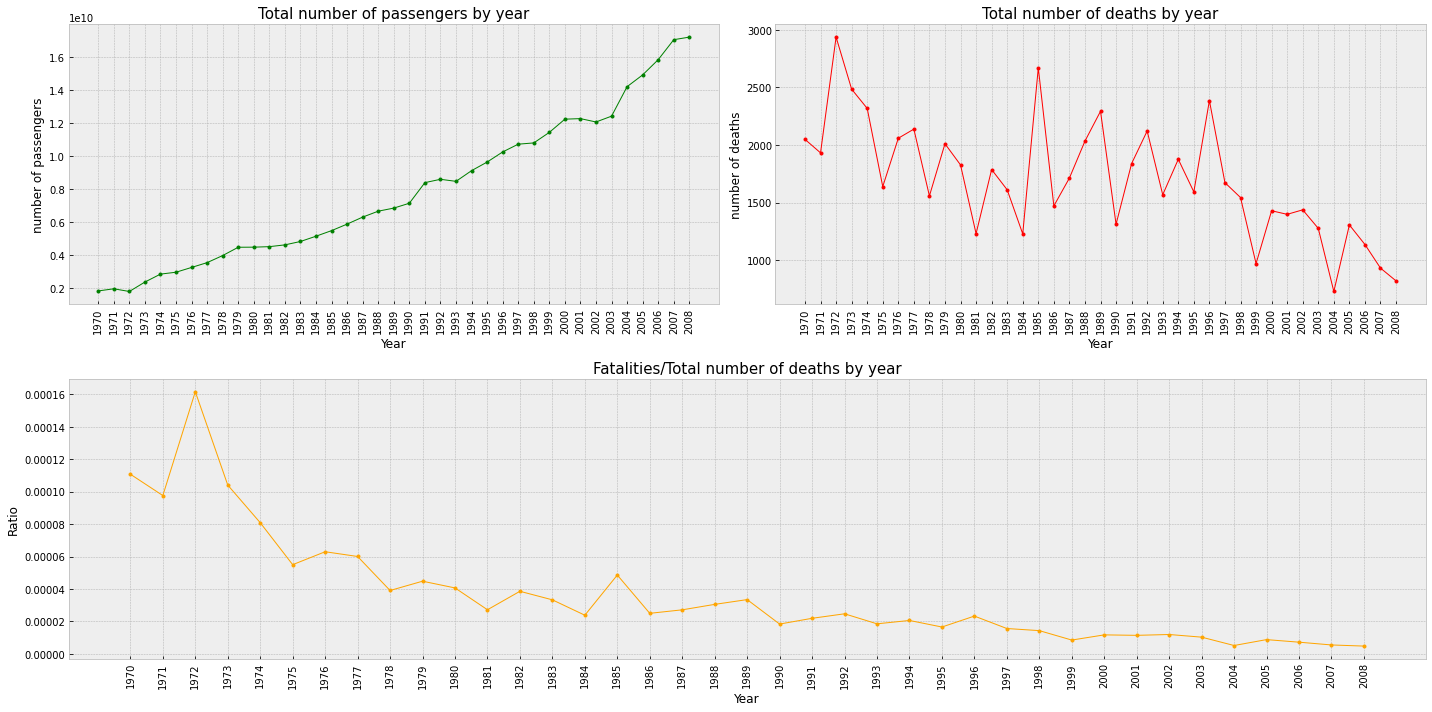

In [154]:
gs=gridspec.GridSpec(2,2)
pl.figure(figsize=(20,10))

ax=pl.subplot(gs[0,0])
plt.plot(Totals.index,'Sum',data=Totals,marker='.',color='green',linewidth=1)
plt.xlabel('Year')
plt.ylabel('number of passengers')
plt.title('Total number of passengers by year',fontsize=15)
plt.xticks(rotation=90)

ax=pl.subplot(gs[0,1])
plt.plot(Fatalities.index,'Fatalities',data=Totals,marker='.',color='red',linewidth=1)
plt.xlabel('Year')
plt.ylabel('number of deaths')
plt.title('Total number of deaths by year',fontsize=15)
plt.xticks(rotation=90)

ax=pl.subplot(gs[1,:])
plt.plot(Fatalities.index,'Ratio',data=Totals,marker='.',color='orange',linewidth=1)
plt.xlabel('Year')
plt.ylabel('Ratio')
plt.title('Fatalities/Total number of deaths by year',fontsize=15)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# **PLOTING RATIO AND NUMBER OF DEATH IN ONE GRAPH**

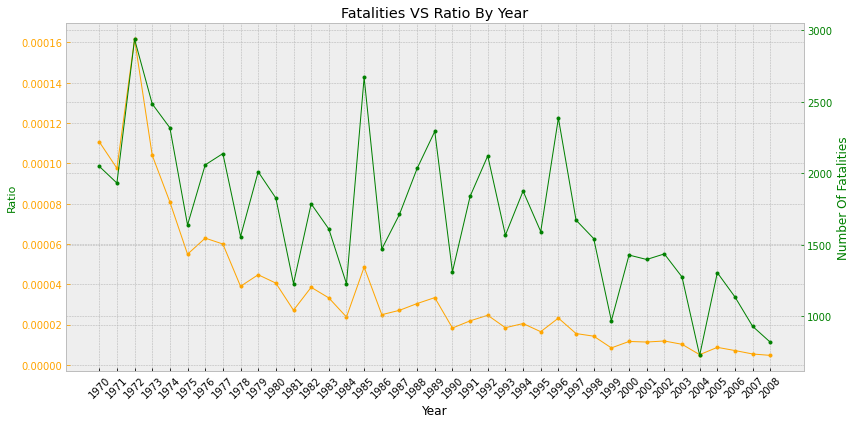

In [161]:
fig=plt.figure(figsize=(12,6))
ax1=fig.subplots()
ax1.plot(Totals.index,'Ratio',data=Totals,color='orange',marker='.',linewidth=1)
ax1.set_xlabel('Year',fontsize=12)
for label in ax1.xaxis.get_ticklabels():
  label.set_rotation(45)
ax1.set_ylabel('Ratio',color='green',fontsize=11)
ax1.tick_params('y',colors='orange')
ax2=ax1.twinx()
ax2.plot(Fatalities.index,'Fatalities',data=Fatalities,color='green',marker='.',linewidth=1)
ax2.set_ylabel('Number Of Fatalities',color='green',fontsize=12)
ax2.tick_params('y',colors='green')
plt.title('Fatalities VS Ratio By Year')
plt.tight_layout()
plt.show()

# **OPERATOR ANALYSIS**

In [168]:
data.Operator=data.Operator.str.upper()
data.Operator=data.Operator.replace("A B AEROTRANSPORT",'AB AEROTRANSPORT')
Total_by_Op=data.groupby('Operator')[['Operator']].count()
Total_by_Op=Total_by_Op.rename(columns={'Operator':'Count'})
Total_by_Op=Total_by_Op.sort_values(by='Count',ascending=False).head(15)

In [169]:
Total_by_Op

,Count
Operator,
AEROFLOT,179
MILITARY - U.S. AIR FORCE,176
AIR FRANCE,70
DEUTSCHE LUFTHANSA,65
AIR TAXI,48
UNITED AIR LINES,44
CHINA NATIONAL AVIATION CORPORATION,44
MILITARY - U.S. ARMY AIR FORCES,43
PAN AMERICAN WORLD AIRWAYS,41


# **PLOTING A GRAPH**

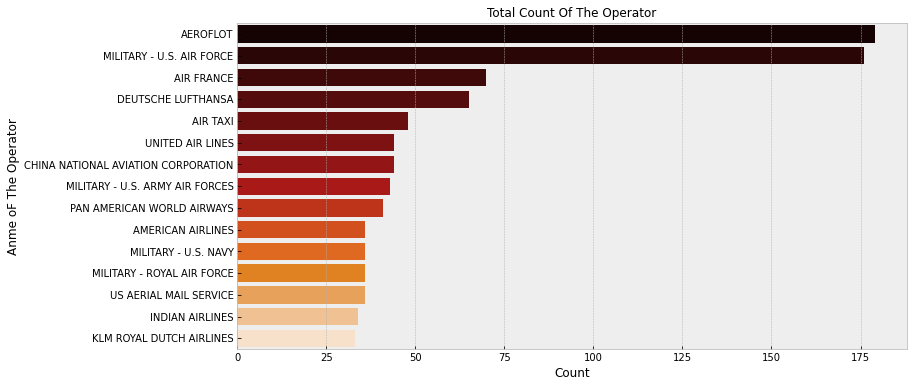

In [171]:
plt.figure(figsize=(12,6))
sns.barplot(y=Total_by_Op.index,x='Count',data=Total_by_Op,palette='gist_heat',orient='h')
plt.xlabel('Count',fontsize=12)
plt.ylabel('Anme oF The Operator',fontsize=12)
plt.title("Total Count Of The Operator",fontsize=12)
plt.show()

# **FATALITIES OCCURED ACCORDING TO THE OPERATOR**

In [178]:
Prop_by_Op=data.groupby('Operator')[['Fatalities']].sum()
Prop_by_Op=Prop_by_Op.rename(columns={'Operator':'Fatalities'})
Prop_by_Op=Prop_by_Op.sort_values(by='Fatalities',ascending=False)
Prop_by_OpTop=Prop_by_Op.head(15)

# **PLOTING GRAPH**

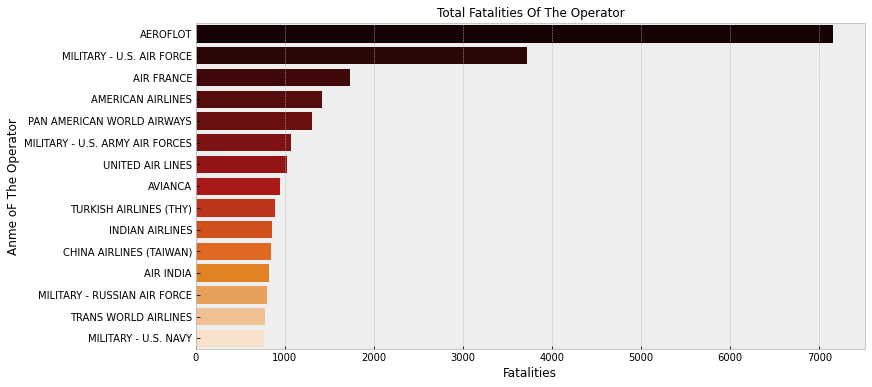

In [179]:
plt.figure(figsize=(12,6))
sns.barplot(y=Prop_by_OpTop.index,x='Fatalities',data=Prop_by_OpTop,palette='gist_heat',orient='h')
plt.xlabel('Fatalities',fontsize=12)
plt.ylabel('Anme oF The Operator',fontsize=12)
plt.title("Total Fatalities Of The Operator",fontsize=12)
plt.show()

# **OPERATOR WITH MINIMUM FATALITIES**

In [180]:
Prop_by_Op[Prop_by_Op['Fatalities']==Prop_by_Op.Fatalities.min()].index.tolist()

['MILITARY - EJÉRCITO DEL AIRE',
 'ARARAT AVIA',
 'HEWA BORA AIRWAYS',
 'MILITARY - UKRAINE AIR FORCE',
 'MILITARY - U.S. AIR FORCE / MILITARY U.S. AIR FORCE',
 'CANADIAN AIR TRANSAT',
 'MILITARY U.S. NAVY',
 'ISLAND SKY FERRY - AIR TAXI',
 'US AIRWAYS',
 'SOUTHWEST AIRLINES',
 'CENTURIAN AIR CARGO',
 'AMERICAN INTERNATIONAL AIRWAYS',
 'REGIONAL COMPAGNIE AERIENNE EUROPEENNE',
 'WESTERN HELICOPTER']

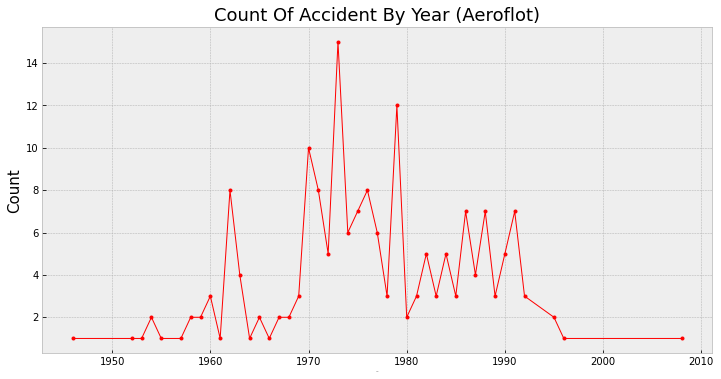

In [186]:
Aeroflot=data[data.Operator=='AEROFLOT']
Count_by_year=Aeroflot.groupby(data.Time.dt.year)[['Date']].count()
Count_by_year=Count_by_year.rename(columns={'Date':'Count'})

plt.figure(figsize=(12,6))
plt.plot(Count_by_year.index,'Count',data=Count_by_year,marker='.',color='red',linewidth=1)
plt.xlabel('Year',fontsize=1)
plt.ylabel('Count',fontsize=15)
plt.title('Count Of Accident By Year (Aeroflot)',fontsize=18)
plt.show()